In [88]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set font to resemble LaTeX
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

sns.set_theme(style="whitegrid")

In [130]:
def create_results_df(res_folder: str) -> pd.DataFrame:
    """
    Create a DataFrame from the results in the results folder.

    :param res_folder: The folder containing the results.
    :return: A DataFrame containing the results.
    """
    results = []
    headers = ['colormap', *[str(i) for i in range(1, 21)]]
    for file in os.listdir(res_folder):
        if file.endswith('.csv'):
            exp = pd.read_csv(os.path.join(res_folder, file), names=headers)
            file_charac = file.split('.')[0].split('_')
            exp["model"] = file_charac[0].split('.')[0]
            exp["CLAHE"] = True if 'clahe' in file_charac else False
            exp["SLIC"] = True if 'slic' in file_charac else False
            # exp["NOC"] = exp[[str(i) for i in range(1, 21)]].values.tolist()
            results.append(exp)
        
    res_df = pd.concat(results)
    res_df = res_df.reset_index(drop=True)
    return res_df

In [131]:
df = create_results_df('/home/gramos/Projects/MIIA-A23/results/interactive/colormap_test/')
df.head()

,colormap,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,model,CLAHE,SLIC
0,greys,0.079,0.272,0.424,0.518,0.581,0.640,0.675,0.703,0.725,...,0.782,0.787,0.787,0.791,0.789,0.788,0.787,ritmh32,True,False
1,inferno,0.056,0.156,0.270,0.358,0.435,0.505,0.561,0.605,0.646,...,0.764,0.773,0.779,0.787,0.789,0.794,0.795,ritmh32,True,False
2,turbo,0.053,0.141,0.235,0.310,0.382,0.451,0.507,0.562,0.608,...,0.738,0.755,0.767,0.774,0.780,0.786,0.785,ritmh32,True,False
3,greys,0.120,0.372,0.537,0.638,0.695,0.731,0.758,0.771,0.779,...,0.798,0.801,0.796,0.798,0.794,0.794,0.788,ritmh32,True,True
4,inferno,0.116,0.316,0.489,0.590,0.658,0.706,0.736,0.756,0.773,...,0.799,0.801,0.802,0.801,0.803,0.804,0.800,ritmh32,True,True


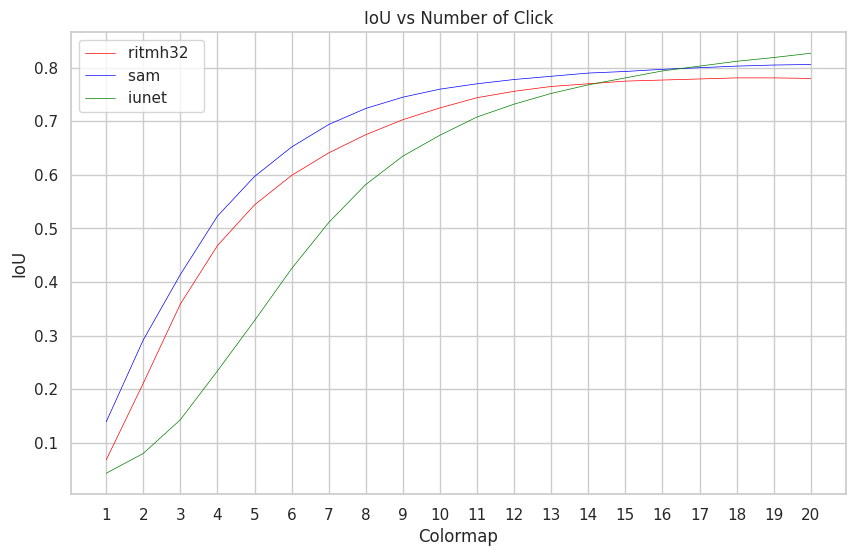

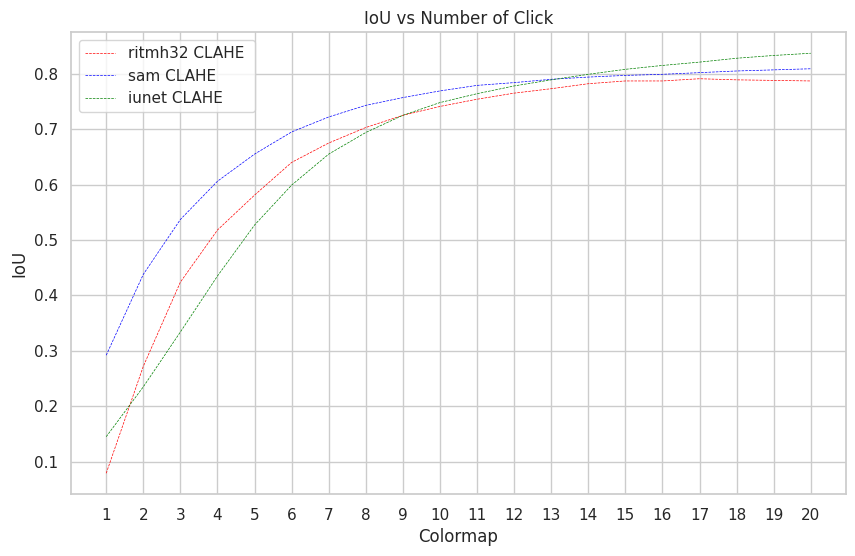

In [141]:
models_colors = {
    'sam': "blue",
    'ritmh32': 'red',
    'iunet': 'green',
}
clahe_line = lambda x: '--' if x else '-'
slic_marker = lambda x: None if not x else 'x'

def plot_results(df: pd.DataFrame, metric: str, title: str):
    """
    Plot the results of the experiments.

    :param df: The DataFrame containing the results.
    :param metric: The metric to plot.
    :param title: The title of the plot.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    for row in df.iterrows():
        plt.plot(
            row[1][1:21],
            label=f"{row[1]['model']} {'CLAHE' if row[1]['CLAHE'] else ''} {'SLIC' if row[1]['SLIC'] else ''}",
            color=models_colors[row[1]['model']],
            linestyle=clahe_line(row[1]['CLAHE']),
            marker=slic_marker(row[1]['SLIC']),
            linewidth=0.5
        )
    ax.set_title(title)
    ax.set_ylabel(metric)
    ax.set_xlabel('Colormap')
    plt.legend()
    plt.xticks()
    plt.show()

plot_results(df[(df.SLIC == 0) & (df.colormap == 'greys') & (df.CLAHE == 0)], 'IoU', 'IoU vs Number of Click')
plot_results(df[(df.SLIC == 0) & (df.colormap == 'greys') & (df.CLAHE == 1)], 'IoU', 'IoU vs Number of Click')
